# Machine Learning Model Building for BigDS

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##### Import file dữ liệu đã được chuẩn hóa cũng như xử lí

In [2]:
file_path = 'Car_Prediction_Splitdata/big/scaled_big_car_used_data_with_outliers.csv'
file_name_with_extension = os.path.basename(file_path)
file_name, file_extension = os.path.splitext(file_name_with_extension)

##### Tạo bảng ghi lại độ chính xác của các mô hình

In [3]:
import csv
import math

data = [
    ['RandomForestRegressor', None, None, None, None, None, None],
    ['DecisionTreeRegressor', None, None, None, None, None, None],
    ['XGBRegressor', None, None, None, None, None, None],
    ['BaggingRegressor', None, None, None, None, None, None]
]

# Tên tiêu đề cột
header = ['Regressor', 'R2_Score','Cross validation score', 'mean_squared_error', 'mean_absolute_error', 'root_mean_squared_error', 'Diff']

file_name = file_name + '_result.csv'

# Tạo và ghi vào file CSV
with open(file_name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(data)

##### Ghi kết quả vào file csv đã tạo

In [4]:
def write_result(name,r2_score_value,scores_value,mean_squared_error,mean_absolute_error,root_mean_squared_error,diff_value):
    data = []
    with open(file_name, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)
    for row in data:
        if row[0] == name:
            row[1] = r2_score_value
            row[2] = scores_value
            row[3] = mean_squared_error
            row[4] = mean_absolute_error
            row[5] = root_mean_squared_error
            row[6] = diff_value

    # Ghi lại dữ liệu đã cập nhật vào file CSV
    with open(file_name, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)

In [5]:
df= pd.read_csv(file_path)
df.head()

,maker_model,variants,body_type,type,seat,door,mileage,non_smoker_vehicle,power,gearbox,engine_size,fuel_type,emission_classe,colour,manufacturer_colour,upholstery_colour,upholstery,car_age,inspection_interval,price (€)
0,-1.500352,0.218739,0.433270,0.419918,0.155740,-0.434859,-0.019211,-1.731720,0.820551,-0.622728,0.884367,-0.893815,0.676819,-0.013562,-0.329873,1.475588,-0.112520,-0.546681,0.466211,74960
1,1.379300,1.072728,1.892357,0.419918,0.155740,0.746877,1.121112,-1.731720,-0.078632,-0.622728,-0.016526,-1.030832,-0.730657,0.214446,-0.336681,-0.341443,-0.818773,0.090389,0.466211,22970
2,1.140293,0.625774,1.892357,0.419918,-2.087474,-0.434859,0.053618,0.577461,-0.720905,-0.622728,-0.016526,-1.030832,-0.730657,1.126480,-0.916674,-0.341443,1.299987,-0.334324,-0.960946,27999
3,-1.249780,1.603253,0.676451,0.419918,0.155740,-0.434859,0.398063,0.577461,1.334370,-0.622728,0.912323,-0.071712,-0.730657,-1.153605,1.122832,-1.249958,-0.112520,0.090389,0.466211,38499
4,-0.004629,1.528637,0.676451,0.419918,0.155740,0.746877,-0.315990,-1.731720,1.141688,-0.622728,0.004216,-0.208729,0.676819,0.898472,0.299133,-0.341443,1.299987,-0.334324,0.466211,38560


In [6]:
X = df.drop(['price (€)'], axis = 1)
Y = df['price (€)']

##### Import các thư viện cần thiết cho việc đánh giá và so sánh mô hình

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score
from sklearn.model_selection import train_test_split

##### Chia tập dữ liệu Train và Test với tỉ lệ 7:3

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (7319, 19)
Training target vector size: (7319,)
Test feature matrix size: (3138, 19)
Test target vector size: (3138,)


## Kiểm thử và đánh giá trên từng mô hình

### RandomForestRegressor

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation Score
scores = cross_val_score(RFR, X, Y, cv = 10).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('RandomForestRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 90.5857026471495
mean_squared_error: 135968529.37396914
mean_absolute_error: 4720.17050696531
root_mean_squared_error: 11660.554419665008

Cross validation score : 86.93700926935118

R2_Score - Cross Validation Score : 3.648693377798324


##### Đồ thị so khớp của mô hình

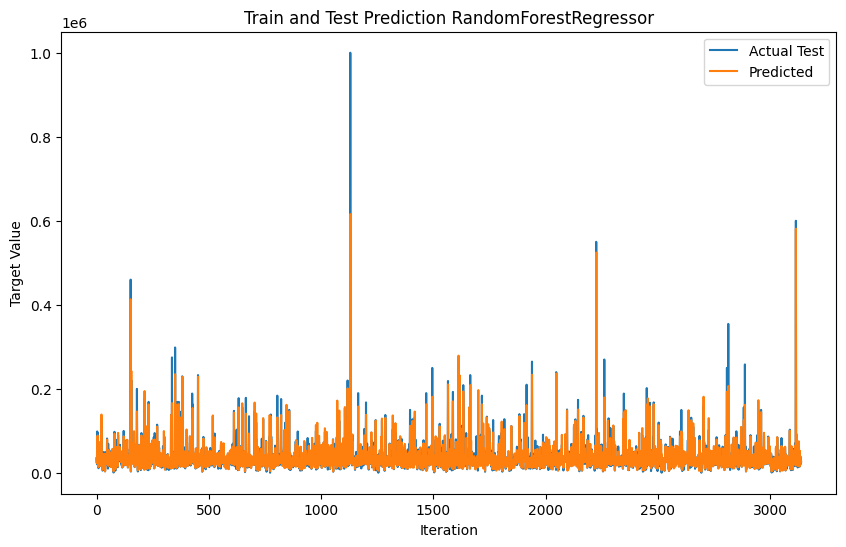

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction RandomForestRegressor')
plt.legend()
plt.savefig('RandomForestRegressor.png')
plt.show()

### XGBRegressor

In [13]:
XGB=XGBRegressor()
XGB.fit(X_train,Y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation on XGB Model
scores = cross_val_score(XGB, X, Y, cv = 10).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('XGBRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 93.00369224127192
mean_squared_error: 101046062.31859837
mean_absolute_error: 4270.958696175716
root_mean_squared_error: 10052.167045896043

Cross validation score : 89.89870769965727

R2_Score - Cross Validation Score : 3.1049845416146553


##### Đồ thị so khớp của mô hình

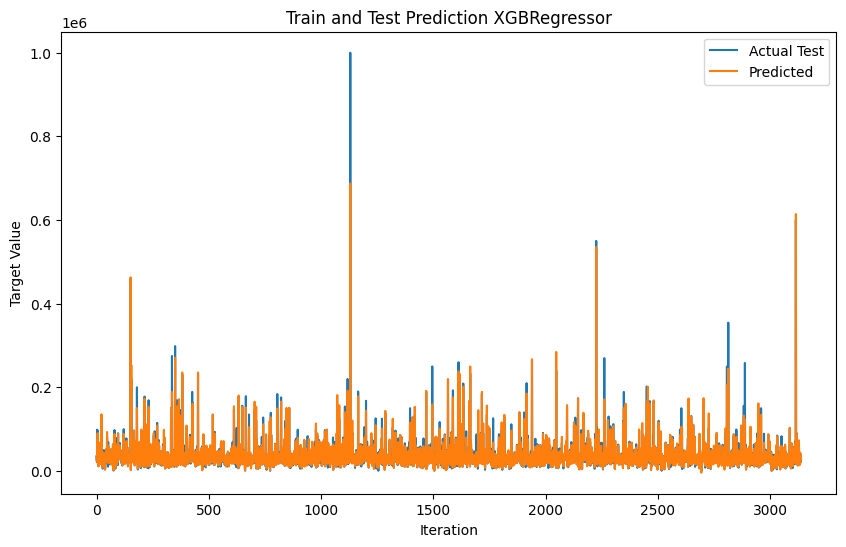

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction XGBRegressor')
plt.legend()
plt.savefig('XGBRegressor.png')
plt.show()

##### Đồ thị Loss của mô hình tốt nhất

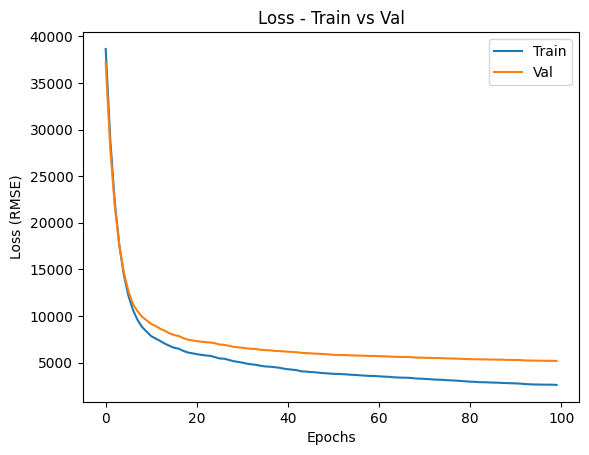

In [15]:
import matplotlib.pyplot as plt

_, X_val, _, Y_val = train_test_split(X, Y, test_size=0.2, random_state=10)
# Huấn luyện mô hình XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_val, Y_val)], eval_metric='rmse', verbose=False)

# Thu thập thông tin loss từ quá trình huấn luyện
train_loss = XGB.evals_result()['validation_0']['rmse']
test_loss = XGB.evals_result()['validation_1']['rmse']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss (RMSE)')
plt.title('Loss - Train vs Val')
plt.legend()
plt.savefig('loss_plot.png')
plt.show()

### DecisionTreeRegressor

In [16]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,Y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))
# Cross Validation Score
scores = cross_val_score(DTR, X, Y, cv = 10).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('DecisionTreeRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 83.9176667564826
mean_squared_error: 232273436.67459813
mean_absolute_error: 6272.329721691098
root_mean_squared_error: 15240.519567081634

Cross validation score : 70.38690563344235

R2_Score - Cross Validation Score : 13.53076112304025


##### Đồ thị so khớp của mô hình

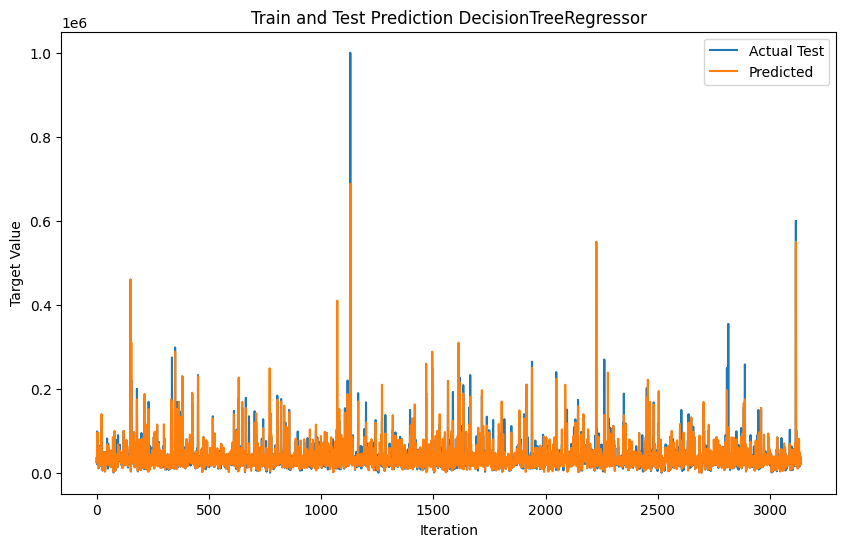

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction DecisionTreeRegressor')
plt.legend()
plt.savefig('DecisionTreeRegressor.png')
plt.show()

### BaggingRegressor

In [18]:
BR=BaggingRegressor()
BR.fit(X_train,Y_train)
pred=BR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation Score
scores = cross_val_score(BR, X, Y, cv = 10).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('BaggingRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 89.41231913730765
mean_squared_error: 152915437.2785251
mean_absolute_error: 5045.211745045374
root_mean_squared_error: 12365.89815899052

Cross validation score : 85.04883546498078

R2_Score - Cross Validation Score : 4.363483672326865


##### Đồ thị so khớp của mô hình

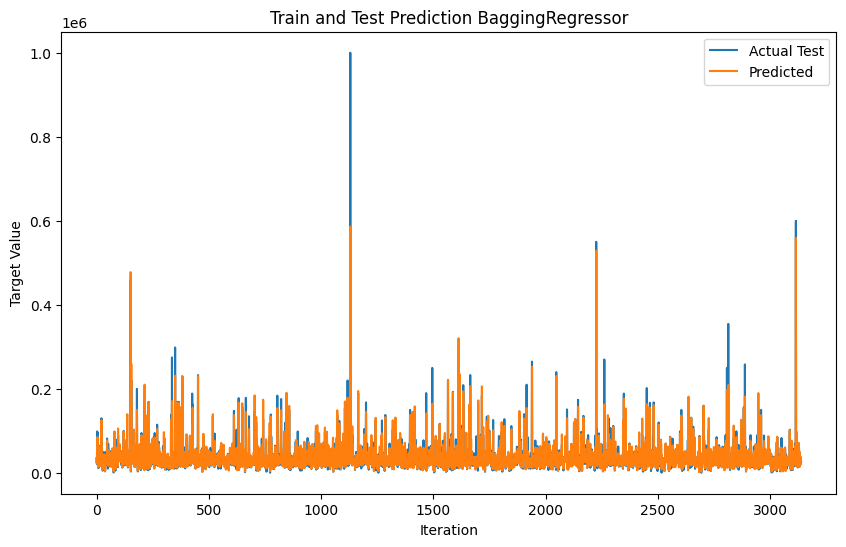

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction BaggingRegressor')
plt.legend()
plt.savefig('BaggingRegressor.png')
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV

##### Dùng **GridSearchCV** để thực hiện kiểm tra chéo và tìm ra siêu tham số tốt nhất

In [21]:
# parameters = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'reg_alpha': [0, 0.1, 0.5],
#     'reg_lambda': [0, 0.1, 0.5]
# }

In [22]:
# model = XGBRegressor()

In [23]:
# grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=10, scoring='neg_mean_squared_error')

In [24]:
# grid_search.fit(X_train, Y_train)

##### Các siêu tham số tốt nhất sau khi Tunning

In [25]:
# grid_search.best_params_

##### Huấn luyện lại mô hình tốt nhất với siêu tham số tốt nhất

In [26]:
# Final_mod_XGB=XGBRegressor( colsample_bytree=1.0, learning_rate=0.2,
#                                 max_depth=4,reg_alpha=0.1,n_estimators=300,reg_lambda=0.5,subsample=1.0 )
# Final_mod_XGB.fit(X_train,Y_train)
# pred=Final_mod_XGB.predict(X_test)
# print('R2_Score:',r2_score(Y_test,pred)*100)
# print('mean_squared_error:',mean_squared_error(Y_test,pred))
# print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
# print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

# scores = cross_val_score(Final_mod_XGB, X, Y, cv = 5).mean()*100
# print("\nCross validation score :", scores)

##### Ta có thể thấy, sau khi được huấn luyện lại với siêu tham số tốt nhất, R2 Score của XBGRegressor cho độ chính xác lên đến **93.5%**, cao hơn lúc chưa lựa chọn siêu tham số (92.2%).

##### Lưu mô hình

In [27]:
# import joblib
# joblib.dump(Final_mod_XGB,"Car_Price_big_XGB.pkl")

In [28]:
# # Loading the saved model
# model=joblib.load("Car_Price_big_XGB.pkl")

# #Prediction
# prediction = model.predict(X_test)
# prediction

##### Xem các giá trị dự đoán và thực tế

In [29]:
# pd.DataFrame([model.predict(X_test)[:],Y_test[:]],index=["Predicted","Actual"])

##### Trực quan hóa bằng đồ thị

In [30]:
# plt.figure(figsize=(10, 6))
# plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
# plt.plot(range(len(pred)), prediction, label='Predicted')
# plt.xlabel('Iteration')
# plt.ylabel('Target Value')
# plt.title('Train and Test Prediction')
# plt.legend()
# plt.show()